In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,0,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,0,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,0,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,0,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,0,4028032.0,0,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
df = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY','INTKEY','LOCATION',
              'EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE',
             'SDOT_COLCODE', 'SDOTCOLNUM'], axis=1)

In [6]:
df.shape

(194673, 27)

In [7]:
df.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,3502005,Matched,Intersection,2,Angles,2,0,...,Overcast,Wet,Daylight,0,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2607959,Matched,Block,1,Sideswipe,2,0,...,Raining,Wet,Dark - Street Lights On,0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,1482393,Matched,Block,1,Parked Car,4,0,...,Overcast,Dry,Daylight,0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,3503937,Matched,Block,1,Other,3,0,...,Clear,Dry,Daylight,0,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,1807429,Matched,Intersection,2,Angles,2,0,...,Raining,Wet,Daylight,0,0,10,Entering at angle,0,0,N


In [8]:
df['INCDTTM'].head()

0      3/27/2013 2:54:00 PM
1     12/20/2006 6:55:00 PM
2    11/18/2004 10:20:00 AM
3      3/29/2013 9:26:00 AM
4      1/28/2004 8:04:00 AM
Name: INCDTTM, dtype: object

In [9]:
# Convert Start_Time and End_Time to datetypes
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['INCDTTM'].dt.year
df['Month']=df['INCDTTM'].dt.strftime('%b')
df['Day']=df['INCDTTM'].dt.day
df['Hour']=df['INCDTTM'].dt.hour
df['Weekday']=df['INCDTTM'].dt.strftime('%a')

In [10]:
## Drop missing values
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,REPORTNO,STATUS,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Year,Month,Day,Hour,Weekday
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDE

In [12]:
#fill the missing values of the following features by their mode
#‘ADDRTYPE’, 'COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL',
#'WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE','ST_COLDESC'
mode = ['ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL','WEATHER',
        'ROADCOND','LIGHTCOND','ST_COLCODE','ST_COLDESC']
for i in mode:
    mode_value = df[i].value_counts().idxmax()
    print (mode_value)
    

Block
Parked Car
Mid-Block (not related to intersection)
0.0
Clear
Dry
Daylight
32
One parked--one moving


In [13]:
mode_value = ['Block','Parked Car','Mid-Block (not related to intersection)',
              '0.0','Clear','Dry','Daylight','32','One parked--one moving']

In [14]:
df['ADDRTYPE'].replace(np.nan, 'Block', inplace=True)
df['COLLISIONTYPE'].replace(np.nan, 'Parked Car', inplace=True)
df['JUNCTIONTYPE'].replace(np.nan, 'Mid-Block (not related to intersection)', inplace=True)
df['UNDERINFL'].replace(np.nan, 0.0, inplace=True)
df['WEATHER'].replace(np.nan, 'Clear', inplace=True)
df['ROADCOND'].replace(np.nan, 'Dry', inplace=True)
df['LIGHTCOND'].replace(np.nan, 'Daylight', inplace=True)
df['ST_COLCODE'].replace(np.nan, '32', inplace=True)
df['ST_COLDESC'].replace(np.nan, 'One parked--one moving', inplace=True)

In [15]:
missing_data = df.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

COLLISIONTYPE
False    194673
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: in

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SEVERITYCODE    194673 non-null  int64         
 1   X               189339 non-null  float64       
 2   Y               189339 non-null  float64       
 3   REPORTNO        194673 non-null  object        
 4   STATUS          194673 non-null  object        
 5   ADDRTYPE        194673 non-null  object        
 6   SEVERITYCODE.1  194673 non-null  int64         
 7   COLLISIONTYPE   194673 non-null  object        
 8   PERSONCOUNT     194673 non-null  int64         
 9   PEDCOUNT        194673 non-null  int64         
 10  PEDCYLCOUNT     194673 non-null  int64         
 11  VEHCOUNT        194673 non-null  int64         
 12  INCDTTM         194673 non-null  datetime64[ns]
 13  JUNCTIONTYPE    194673 non-null  object        
 14  SDOT_COLDESC    194673 non-null  obj

In [17]:
df_corr=df.corr()

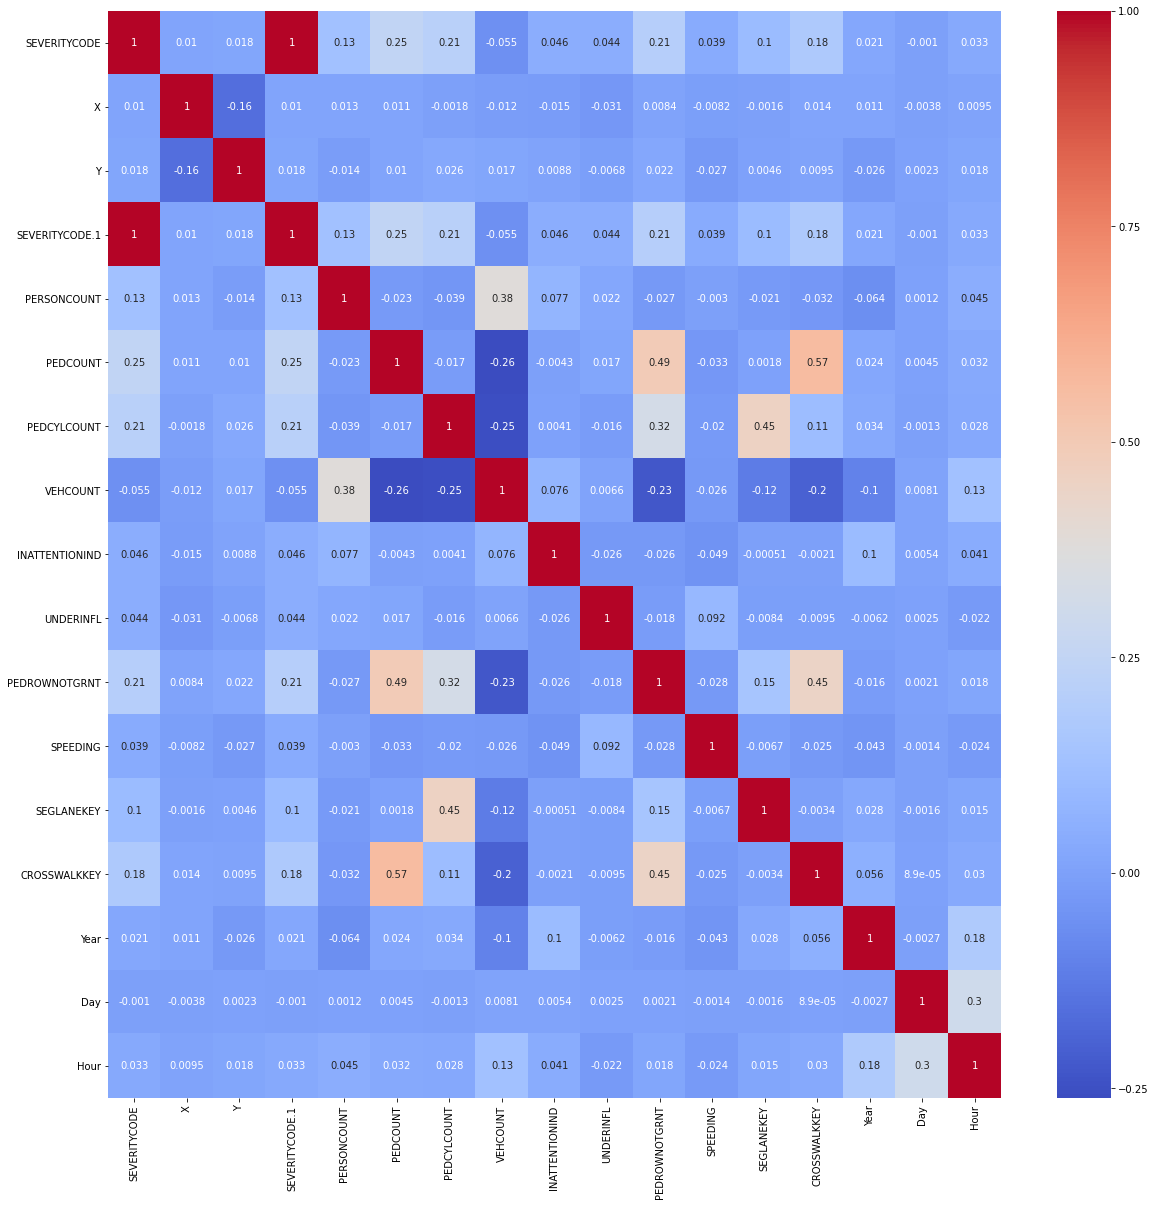

In [18]:
##heat map
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(df_corr, annot= True, cmap='coolwarm')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

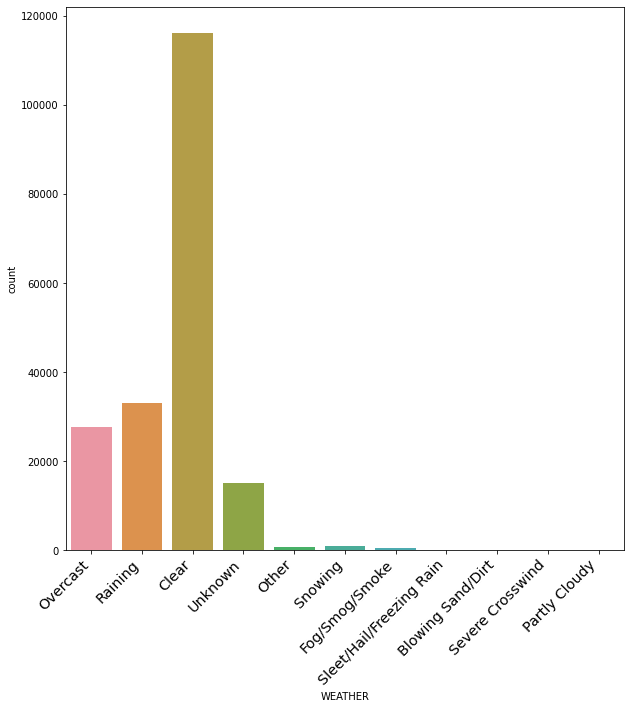

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['WEATHER'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

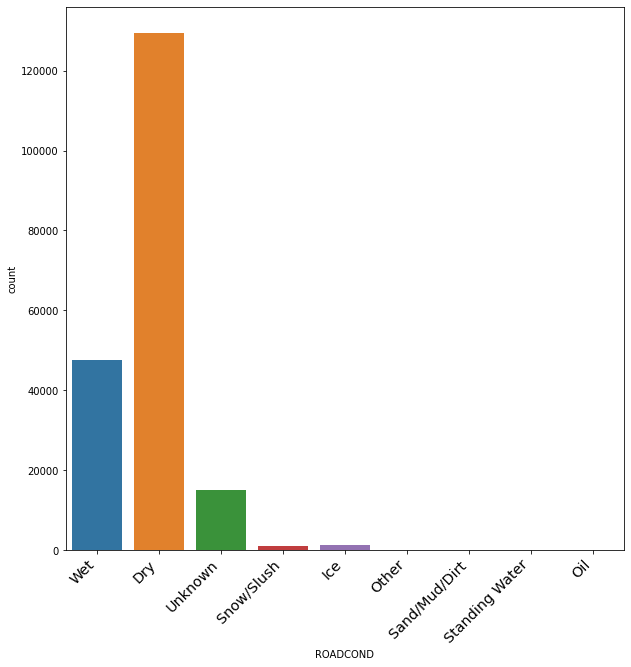

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df['ROADCOND'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

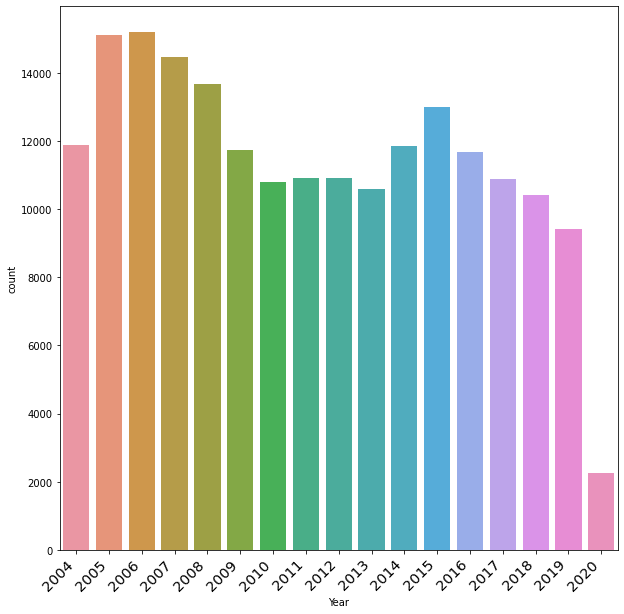

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(df['Year'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

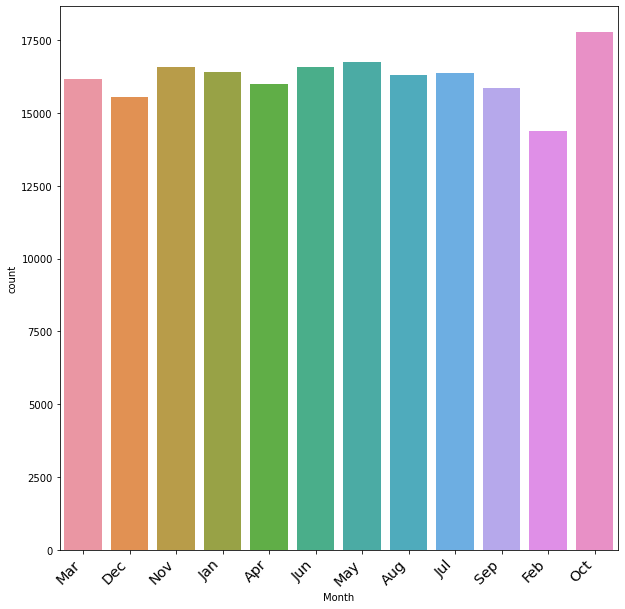

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(df['Month'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

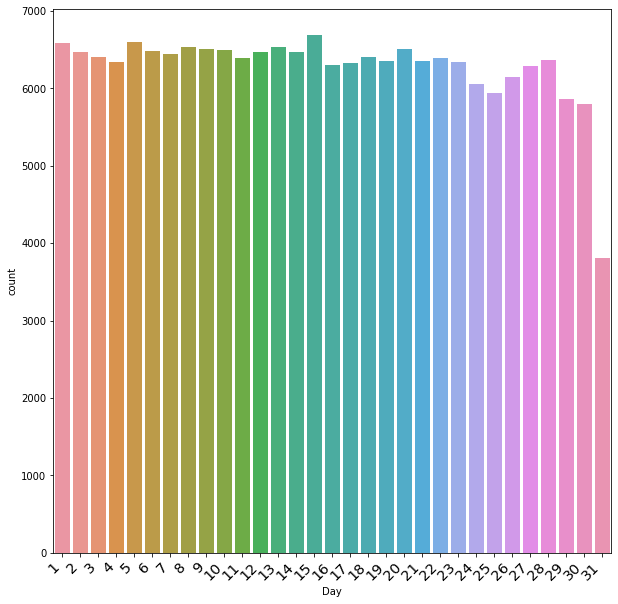

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df['Day'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

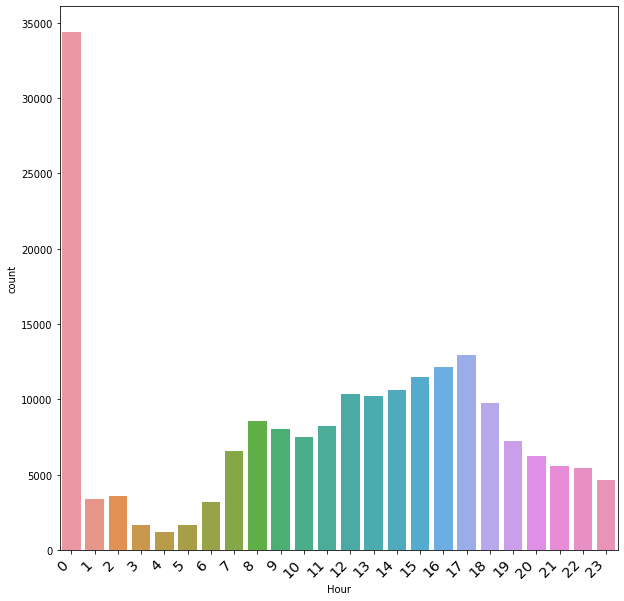

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(df['Hour'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

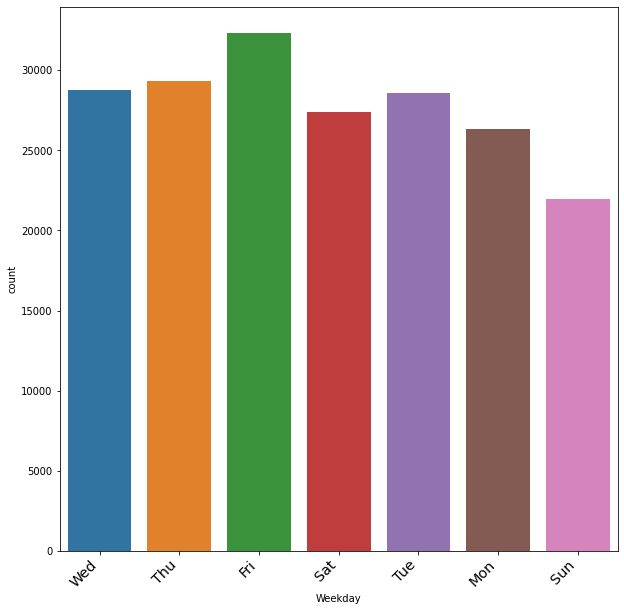

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(df['Weekday'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [26]:
## balance the data
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [27]:
# splitting the column of addrtype
df[pd.get_dummies(df['ADDRTYPE']).columns] = pd.get_dummies(df['ADDRTYPE'])
df.drop(['ADDRTYPE'], axis=1, inplace=True)

# splitting the column of collisiontype
df[pd.get_dummies(df['COLLISIONTYPE']).columns] = pd.get_dummies(df['COLLISIONTYPE'])
df.drop(['COLLISIONTYPE'], axis=1, inplace=True)

# splitting the column of junctiontype
df[pd.get_dummies(df['JUNCTIONTYPE']).columns] = pd.get_dummies(df['JUNCTIONTYPE'])
df.drop(['JUNCTIONTYPE'], axis=1, inplace=True)

# splitting the column of weather
df[pd.get_dummies(df['WEATHER']).columns] = pd.get_dummies(df['WEATHER'])
df.drop(['WEATHER'], axis=1, inplace=True)

# splitting the column of roadconditions
df[pd.get_dummies(df['ROADCOND']).columns] = pd.get_dummies(df['ROADCOND'])
df.drop(['ROADCOND'], axis=1, inplace=True)

# splitting the column of lightconditions
df[pd.get_dummies(df['LIGHTCOND']).columns] = pd.get_dummies(df['LIGHTCOND'])
df.drop(['LIGHTCOND'], axis=1, inplace=True)

df.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,3502005,Matched,2,2,0,0,2,...,0,0,1,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,2607959,Matched,1,2,0,0,2,...,0,0,1,0,0,1,0,0,0,0
2,1,-122.334540,47.607871,1482393,Matched,1,4,0,0,3,...,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3503937,Matched,1,3,0,0,3,...,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,1807429,Matched,2,2,0,0,2,...,0,0,1,0,0,0,0,0,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 69 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   SEVERITYCODE                                       194673 non-null  int64         
 1   X                                                  189339 non-null  float64       
 2   Y                                                  189339 non-null  float64       
 3   REPORTNO                                           194673 non-null  object        
 4   STATUS                                             194673 non-null  object        
 5   SEVERITYCODE.1                                     194673 non-null  int64         
 6   PERSONCOUNT                                        194673 non-null  int64         
 7   PEDCOUNT                                           194673 non-null  int64         
 8   PEDC

In [29]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [42]:
#  setting up for training and train/test split

df_model = df
X = df_model.drop(['SEVERITYCODE','SEVERITYCODE.1','X','Y','STATUS','SDOT_COLDESC','INCDTTM','REPORTNO',
                   'Year','Month','Day','Weekday','ST_COLDESC','HITPARKEDCAR','ST_COLCODE'],axis=1)
y = df_model['SEVERITYCODE']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7,test_size=0.3)

In [43]:
from sklearn.utils import resample

# concatenate our training data back together
train = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
class1 = train[train.SEVERITYCODE==1]
class2 = train[train.SEVERITYCODE==2]

# upsample minority
upsampled = resample(class2,
                     replace=True, # sample with replacement
                     n_samples=len(class1), # match number in majority class
                     random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_class = pd.concat([class1, upsampled])

# check new class counts
upsampled_class.SEVERITYCODE.value_counts()

y_train = upsampled_class.SEVERITYCODE
X_train = upsampled_class.drop('SEVERITYCODE', axis=1)

In [44]:
# Looking at the Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)

In [ ]:
# looking into Support Vector Machine

clf = svm.SVC(kernel = "linear")
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)

In [45]:
# looking at the Decision Tree

dt = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)

In [46]:
# looking into Random Forest Classifier

m = RandomForestClassifier(n_estimators=100, criterion="entropy")
m.fit(X_train, y_train)
yhat_rfc = m.predict(X_test)

In [41]:

from sklearn.metrics import f1_score, precision_score, recall_score
f1lr = f1_score(y_test, yhat_lr)
f1dt = f1_score(y_test, yhat_dt)
f1rf = f1_score(y_test, yhat_rfc)
#f1svm = f1_score(y_test, yhat_svm)


acclr = accuracy_score(y_test, yhat_lr)
accdt = accuracy_score(y_test, yhat_dt)
accrf = accuracy_score(y_test, yhat_rfc)
#accsvm = accuracy_score(y_test, yhat_svm)


plr = precision_score(y_test, yhat_lr)
pdt = precision_score(y_test, yhat_dt)
prf = precision_score(y_test, yhat_rfc)
#psvm = precision_score(y_test, yhat_svm)

rlr = recall_score(y_test, yhat_lr)
rdt = recall_score(y_test, yhat_dt)
rrf = recall_score(y_test, yhat_rfc)
#rsvm = recall_score(y_test, yhat_svm)


results = [['Model', 'Accuracy score', 'F1 score', 'Precision','Recall'],
           ['Logistic Regression', acclr, f1lr, plr, rlr],
           ['Decision Tree',accdt, f1dt,pdt,rdt],
           ['Random Forest',accrf,f1rf,prf,rrf]]
#['Support Vector Machine', accsvm, f1svm, psvm, rsvm]
results = pd.DataFrame(results)       
print(results)

                     0               1         2          3         4
0                Model  Accuracy score  F1 score  Precision    Recall
1  Logistic Regression        0.561944  0.680915   0.534821   0.93682
2        Decision Tree        0.713359  0.684401   0.759301   0.62295
3        Random Forest        0.751718   0.73479   0.786603  0.689381
